# LDA with Headlines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df=pd.read_csv('./HealthMap_Scraped.csv')

In [5]:
df.Headline.head()

0    Kutcher tells Council about water situation - ...
1    Under boil order, Murray awaits water test res...
2    Puerto Ricans at Risk of Waterborne Disease Ou...
3    Howes: In Flint water war, city only has one c...
4    DEP orders PWSA to make critical infrastrucure...
Name: Headline, dtype: object

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords

In [3]:
# Code taken from Richard Harris
def cleaner(text):
    stemmer = PorterStemmer()
    stop = stopwords.words('english')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.lower().strip()
    final_text = []
    for w in text.split():
        if w not in stop:
            final_text.append(stemmer.stem(w.strip()))
    return ' '.join(final_text)

In [6]:
text = pd.DataFrame(df['Headline'])
text

,Headline
0,Kutcher tells Council about water situation - ...
1,"Under boil order, Murray awaits water test res..."
2,Puerto Ricans at Risk of Waterborne Disease Ou...
3,"Howes: In Flint water war, city only has one c..."
4,DEP orders PWSA to make critical infrastrucure...
5,Private water wells in Texas test positive for...
6,How long it could take to repair massive Oakla...
7,"Boil water advisories issued for Clinton, Wils..."
8,Happening Now BREAKING- Boil Water Order Lifte...
9,Boil water order lifted in Astoria - Daily Ast...


In [7]:
cv = CountVectorizer(preprocessor=cleaner, min_df=2)
X = cv.fit_transform(text['Headline'].values)
X

<7724x3115 sparse matrix of type '<class 'numpy.int64'>'
	with 59362 stored elements in Compressed Sparse Row format>

In [8]:
feature_names = cv.get_feature_names()
feature_names

['abat',
 'abbotsford',
 'abc',
 'abcchicagocom',
 'abccolumbiacom',
 'abccom',
 'abconyoursidecom',
 'aberdeen',
 'abilen',
 'abita',
 'abq',
 'absaroke',
 'acacio',
 'access',
 'accid',
 'acr',
 'across',
 'action',
 'actionnewsjaxcom',
 'activ',
 'ada',
 'adair',
 'adam',
 'adamsvil',
 'addison',
 'addit',
 'address',
 'adel',
 'adirondack',
 'adjust',
 'adrian',
 'advanc',
 'advantag',
 'advertis',
 'advis',
 'adviso',
 'advisori',
 'advisory',
 'advistori',
 'advoc',
 'affect',
 'afternoon',
 'age',
 'agenc',
 'ago',
 'aiken',
 'air',
 'airi',
 'airport',
 'akron',
 'alabama',
 'alamo',
 'alaska',
 'alban',
 'albani',
 'albion',
 'albuquerqu',
 'alcom',
 'alden',
 'alert',
 'alexand',
 'alexandria',
 'alga',
 'allen',
 'allendal',
 'allentown',
 'alma',
 'almost',
 'along',
 'altern',
 'alton',
 'altoona',
 'alvarado',
 'amarillocom',
 'ame',
 'america',
 'american',
 'americanstatesman',
 'amid',
 'amit',
 'amiti',
 'among',
 'amsterdam',
 'anderson',
 'anf',
 'angel',
 'angelo',

In [9]:
lda = LatentDirichletAllocation(n_topics=5, random_state=5)

lda.fit(X)

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=5,
             perp_tol=0.1, random_state=5, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [10]:
print(lda.components_.shape)

(5, 3115)


In [11]:
results = pd.DataFrame(lda.components_, columns=feature_names)

In [12]:
# Use less than 6
for topic in range(5):
    print('Topic', topic)
    word_list = results.T[topic].sort_values(ascending=False).index
    print(' '.join(word_list[0:25]), '\n')

Topic 0
water boil advisori issu order lift effect news counti area daili main break notic kfv custom part citi resid system west precautionari wboytv villag tribun 

Topic 1
beach close bacteria lake due state park news high level patchcom portion swim found coli shore channel sentinel bay river area local counti two island 

Topic 2
boilwat gazett time charleston jacksonvil hill continu offici news creek township wsaztv advis ledger union warn ky say flood chronicl lift columbia lafayett grove lexington 

Topic 3
water drink east road republ coli found sun outbreak nbc test bacteria san newstalk safe contamin wcsi school ktb well coliform witn eagl week posit 

Topic 4
boil order water issu lift counti notic resid news citi boilwat break custom daili alert herald main part journal subscript press star valley kwtx american 



In [13]:
from wordcloud import WordCloud

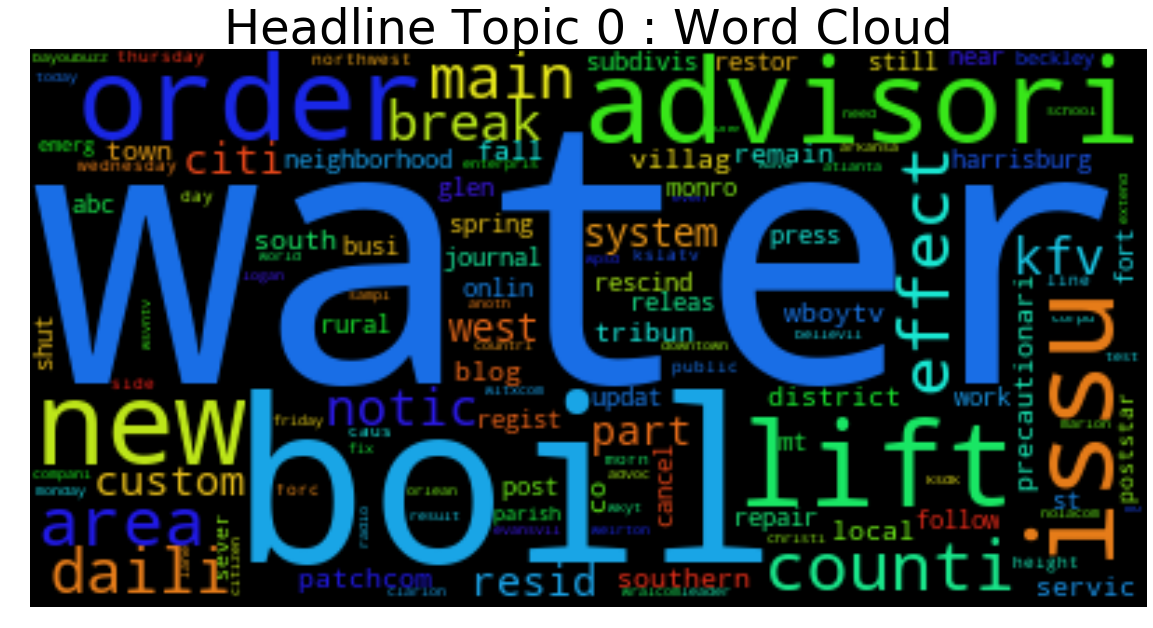

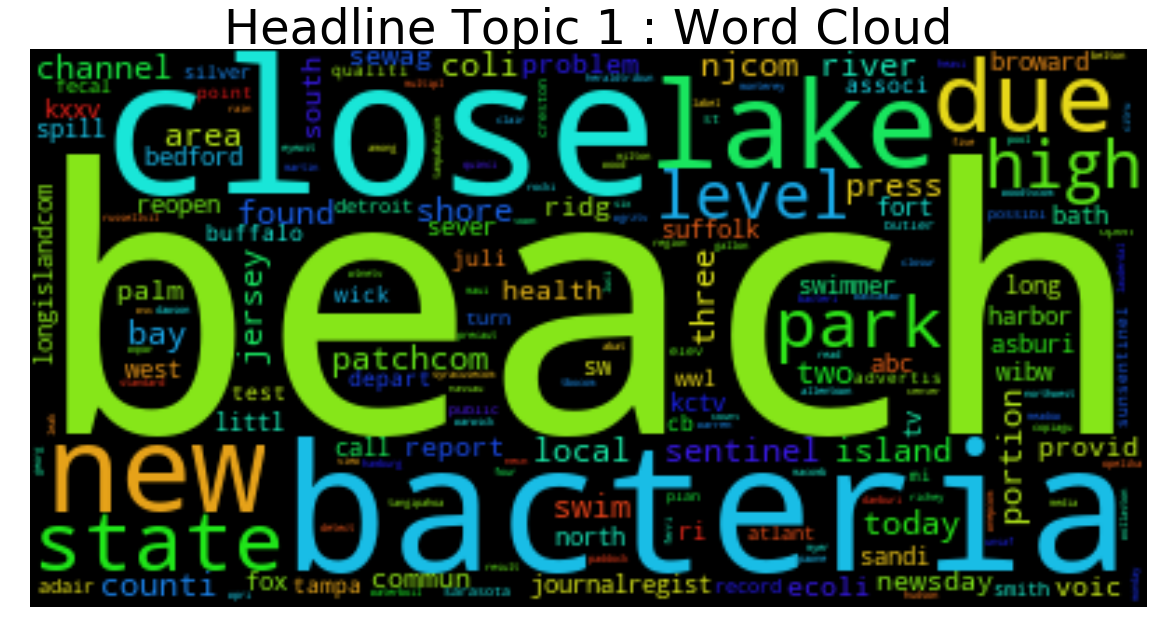

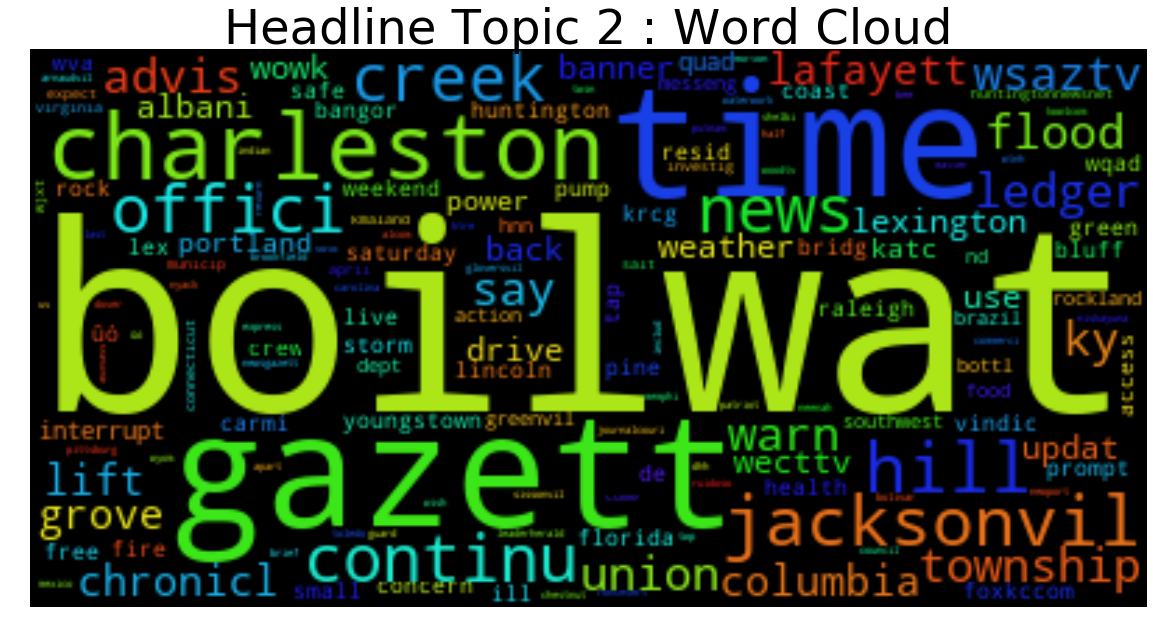

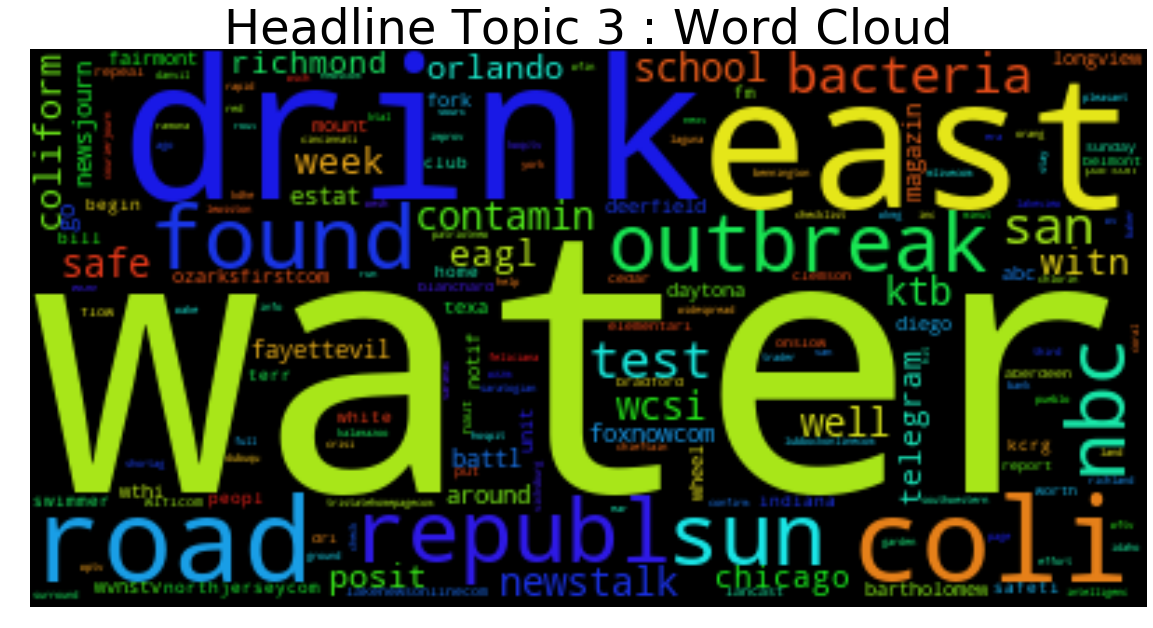

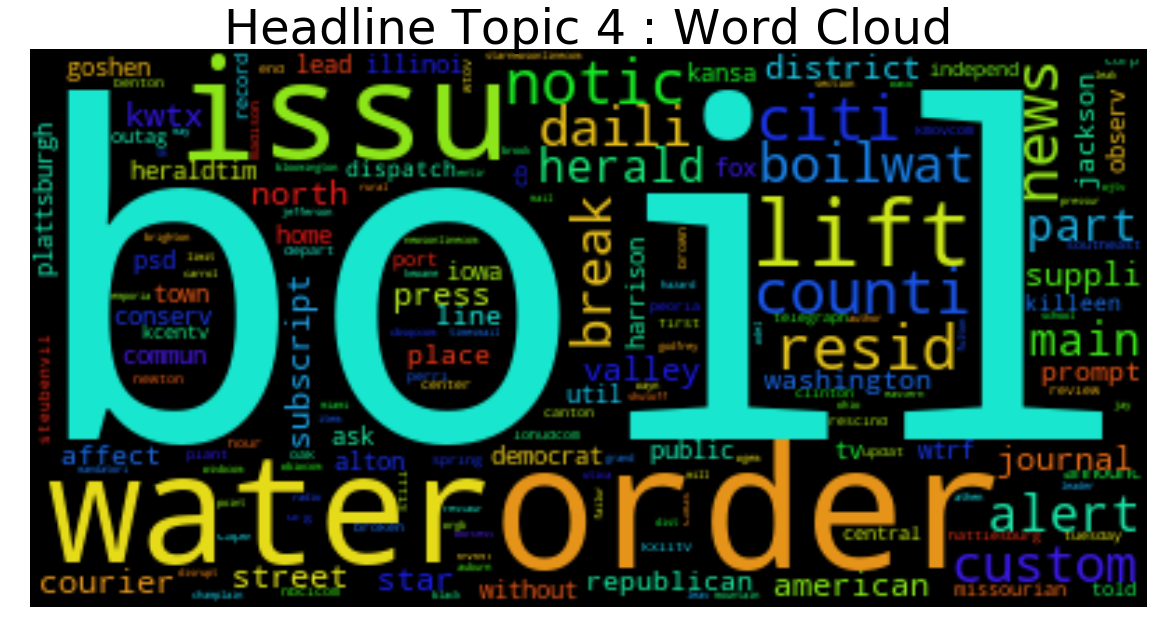

In [14]:
for topic in range(5):
    word_counts = []
    words_in_topic = results.T[topic].sort_values(ascending=False)
    for word, count in words_in_topic.iteritems():
        string = ''.join(((word + ' ')*int(count)))
        word_counts.append(string)
    
    topic_words = ' '.join(word_counts)
    
    cloud = WordCloud().generate(topic_words)
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.title('Headline Topic ' + str(topic) + ' : Word Cloud', fontsize=48)
    plt.axis('off')

# Can We Take A Guess A What These Potential Topics Are?

** Topic 0: New boil-orders issued or lifted/repaired.  Precautionary boil-orders**

** Topic 1: Beach/Lake/River/ swimming areas closed due to bacteria found in water.  Seems to happen in NJ.**

** Topic 2: Boil water lifted in many different towns.  Most likely the most dummy of the columns.**

** Topic 3: Drinking water contaminated affecting schools.  Found safe.**

** Topic 4: Boil-order issued, continuing, or lifted.**

In [15]:
transformed = lda.transform(X)
transformed

array([[ 0.02598841,  0.02500103,  0.65356219,  0.26981822,  0.02563015],
       [ 0.91830512,  0.02036649,  0.02040395,  0.02069031,  0.02023414],
       [ 0.02000041,  0.1180331 ,  0.02022107,  0.82174496,  0.02000046],
       ..., 
       [ 0.02575011,  0.02544131,  0.39957685,  0.52361944,  0.02561229],
       [ 0.02240092,  0.02226301,  0.02225065,  0.91072769,  0.02235774],
       [ 0.46654405,  0.02254008,  0.0222237 ,  0.24487187,  0.24382031]])

In [16]:
transformed.shape

(7724, 5)

In [17]:
text.shape

(7724, 1)

In [18]:
transformed_df = pd.DataFrame(transformed, columns=range(5))
counter = 0
for i in transformed_df.idxmax():
    print("Topic ", counter, text['Headline'].iloc[i])
    counter += 1

Topic  0 Latest water test clear; one more day of clear testing required to lift boil order - Artesia Daily Press
Topic  1 Aug. 16, 2017 lake test results: Paddock Hooker Lake Association beach closed; Silver Lake County Park beach and ... - West of the I
Topic  2 Flu Numbers Continue To Rise - LEX18.com | Continuous News and StormTracker Weather - LEX18 Lexington KY News
Topic  3 What's Going Around: Swimmer's ear, walking pneumonia, & mosquito bites - ABC27
Topic  4 Goshen boil order issued after water main break affecting North 5th Street - The Elkhart Truth


In [19]:
transformed_df = pd.DataFrame(transformed, columns=range(5))
counter = 0
for i in transformed_df.idxmax():
    print("Topic ", counter, df['Alert Tag'].iloc[i])
    counter += 1

Topic  0 Warning
Topic  1 Warning
Topic  2 Warning
Topic  3 Warning
Topic  4 Warning


# Validation

In [20]:
transformed_df.head()

,0,1,2,3,4
0,0.025988,0.025001,0.653562,0.269818,0.025630
1,0.918305,0.020366,0.020404,0.020690,0.020234
2,0.020000,0.118033,0.020221,0.821745,0.020000
3,0.706202,0.207319,0.028680,0.028652,0.029147
4,0.300642,0.025005,0.025661,0.150819,0.497872


In [21]:
transformed_df.columns = ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']

In [22]:
transformed_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,0.025988,0.025001,0.653562,0.269818,0.025630
1,0.918305,0.020366,0.020404,0.020690,0.020234
2,0.020000,0.118033,0.020221,0.821745,0.020000
3,0.706202,0.207319,0.028680,0.028652,0.029147
4,0.300642,0.025005,0.025661,0.150819,0.497872


In [23]:
topic_dict = {'Topic_0': 'New boil orders issued or lifted/repaired.  Precautionary boil orders',
              'Topic_1': 'Beach/Lake/River/ swimming areas closed due to bacteria found in water.  Seems to happen in NJ.',
              'Topic_2': 'Boil water lifted in many different towns.  Most likely the most dummy of the columns.',
              'Topic_3': 'Drinking water contaminated affecting schools.  Found safe.',
              'Topic_4': 'Boil order issued, continuing, or lifted.'}

In [24]:
transformed_df.shape

(7724, 5)

In [25]:
df.shape

(7724, 14)

In [26]:
validation_df = pd.concat([df, transformed_df], axis=1)

In [27]:
validation_df.head()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,-75.498100,38.993500,XXXXXX Murray Ledger and Times,NaN,0.025988,0.025001,0.653562,0.269818,0.025630
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,-84.462898,37.439899,XXXXXX WPSD Local 6,NaN,0.918305,0.020366,0.020404,0.020690,0.020234
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,-66.501404,18.251301,XXXXXX Close Embed this video More videos (1...,Natural disaster related,0.020000,0.118033,0.020221,0.821745,0.020000
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,-84.462898,43.580299,XXXXXX FacebookEmail Twitter Google+ LinkedIn...,NaN,0.706202,0.207319,0.028680,0.028652,0.029147
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,-77.475601,40.930099,XXXXXX {copyShortcut} to copy Link copied! Up...,NaN,0.300642,0.025005,0.025661,0.150819,0.497872


In [28]:
# May want to plot distribution plots
validation_df.iloc[:, 15:].describe()

,Topic_1,Topic_2,Topic_3,Topic_4
count,7724.000000,7724.000000,7724.000000,7724.000000
mean,0.117318,0.098342,0.088151,0.320634
std,0.205231,0.131544,0.135067,0.309207
min,0.009681,0.009525,0.011112,0.011778
25%,0.022223,0.022224,0.022223,0.025439
50%,0.025884,0.028572,0.025070,0.251565
75%,0.120128,0.136284,0.113077,0.575166
max,0.952698,0.938174,0.927157,0.942625


In [29]:
for key, topic in enumerate(transformed_df.idxmax(axis=1)):
    if topic == "Topic_0":
        df.at[key, 'topic'] = 'New boil-order issued or repaired'   
    elif topic == 'Topic_1':
        df.at[key, 'topic'] = 'Beach/Lake/Park closed from bacteria in water'
    elif topic == 'Topic_2':
        df.at[key, 'topic'] = 'Hard to classify'
    elif topic == 'Topic_3':
        df.at[key, 'topic'] = 'Drinking water contaminated'
    else:
        df.at[key, 'topic'] = 'Existing boil-order continuing or lifted'

In [30]:
df.topic.value_counts()

New boil-order issued or repaired                3428
Existing boil-order continuing or lifted         2980
Beach/Lake/Park closed from bacteria in water     661
Hard to classify                                  365
Drinking water contaminated                       290
Name: topic, dtype: int64

In [51]:
df.shape

(7724, 15)

In [48]:
print( df.sample(n=20).index)

Int64Index([2747, 1309, 5626, 7150,  249, 6227, 6584,  690, 6477, 4896, 4750,
            3348, 6126,  757, 1053, 5507, 5757, 4431, 6125, 4841],
           dtype='int64')


In [49]:
# Topics seem to match.  Let's see if we can use this as a ground truth for a classification model.
sample = df.sample(n=20).index
for index in sample:
    print(index)
    print('Headline :', df['Headline'][index])
    print('Alert Tag :', df['Alert Tag'][index])
    print('Topic :', df['topic'][index])
    print('----------------------------------------')

801
Headline : Officials investigating after several fall ill at Yale School of Medicine - WTNH Connecticut News (press release)
Alert Tag : Warning
Topic : Hard to classify
----------------------------------------
3587
Headline : Boil Order in Silvis - cbs4qc.com
Alert Tag : Breaking
Topic : Existing boil-order continuing or lifted
----------------------------------------
6737
Headline : Boil water notice for some Moffat residents - KXXV News Channel 25
Alert Tag : Warning
Topic : Existing boil-order continuing or lifted
----------------------------------------
4580
Headline : Boil water advisory for parts of Summerville - ABC NEWS 4
Alert Tag : Warning
Topic : New boil-order issued or repaired
----------------------------------------
5426
Headline : Boil Water Advisory For Piermont And Grandview - Patch.com
Alert Tag : Warning
Topic : New boil-order issued or repaired
----------------------------------------
1888
Headline : Gretna boil water advisory lifted - WWL
Alert Tag : Context


In [32]:
df.head()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,topic
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,-75.498100,38.993500,XXXXXX Murray Ledger and Times,NaN,Hard to classify
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,-84.462898,37.439899,XXXXXX WPSD Local 6,NaN,New boil order issued or repaired
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,-66.501404,18.251301,XXXXXX Close Embed this video More videos (1...,Natural disaster related,Drinking water contaminated
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,-84.462898,43.580299,XXXXXX FacebookEmail Twitter Google+ LinkedIn...,NaN,New boil order issued or repaired
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,-77.475601,40.930099,XXXXXX {copyShortcut} to copy Link copied! Up...,NaN,Existing boil order continuing or lifted


In [50]:
df.Headline[2]

'Puerto Ricans at Risk of Waterborne Disease Outbreak in Wake of Hurricane Maria - NBC Chicago'

# Classification Modeling

In [97]:
df.to_csv('./HealthMap_with_LDA_targets.csv', index=False)

In [4]:
df = pd.read_csv('./HealthMap_with_LDA_targets.csv')

In [6]:
df.head()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,topic
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,-75.498100,38.993500,XXXXXX Murray Ledger and Times,NaN,Hard to classify
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,-84.462898,37.439899,XXXXXX WPSD Local 6,NaN,New boil order issued or repaired
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,-66.501404,18.251301,XXXXXX Close Embed this video More videos (1...,Natural disaster related,Drinking water contaminated
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,-84.462898,43.580299,XXXXXX FacebookEmail Twitter Google+ LinkedIn...,NaN,New boil order issued or repaired
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,-77.475601,40.930099,XXXXXX {copyShortcut} to copy Link copied! Up...,NaN,Existing boil order continuing or lifted


In [5]:
# Will try to predict boil order by headline
# Will combine new boil order and existing boil order as one target and make binomial
df.topic.value_counts()

New boil order issued or repaired                3428
Existing boil order continuing or lifted         2980
Beach/Lake/Park closed from bacteria in water     661
Hard to classify                                  365
Drinking water contaminated                       290
Name: topic, dtype: int64

In [7]:
for key, value in enumerate(df.topic):
    if value == 'New boil order issued or repaired' or value == 'Existing boil order continuing or lifted':
        df.at[key, 'topic'] = 1
    else:
        df.at[key, 'topic'] = 0

In [8]:
df.topic.value_counts()

1    6408
0    1316
Name: topic, dtype: int64

In [9]:
# Score to beat
baseline = 6408/(6408 + 1316)
baseline

0.8296219575349559

In [10]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import string

In [11]:
X = df['Headline']
target = df['topic']

In [12]:
X.head()

0    Kutcher tells Council about water situation - ...
1    Under boil order, Murray awaits water test res...
2    Puerto Ricans at Risk of Waterborne Disease Ou...
3    Howes: In Flint water war, city only has one c...
4    DEP orders PWSA to make critical infrastrucure...
Name: Headline, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size =0.33, stratify=target)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5175,) (5175,) (2549,) (2549,)


In [15]:
X_train[:5]

5859    Boil order issued for parts of Bowie County - ...
7578    Boil order: Southern Monroe Water Corp custome...
4857    Boil water order or advisory? - South County Mail
3522    Boil water order issued for part of Murphysbor...
4140    Boil water ordered due to plant failure - Park...
Name: Headline, dtype: object

In [16]:
y_train.head()

5859    1
7578    1
4857    1
3522    1
4140    1
Name: topic, dtype: object

In [19]:
cv = CountVectorizer(preprocessor=cleaner)
cv.fit(X_train)

words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())
print(words.sum().sort_values(ascending=False).head(10))

boil        3836
water       3656
order       2233
issu        1557
advisori    1452
lift         860
news         616
counti       519
beach        457
boilwat      382
dtype: int64


In [20]:
words.shape

(5175, 4560)

In [21]:
# Not many features.  May not need to do TruncatedSVD or limit words.  May want to use n_grams of 2
print(words.shape)

(5175, 4560)


In [22]:
# Still some nonsense words.  
words.head()

,abat,abbotsford,abc,abcchicagocom,abccolumbiacom,abccom,abcnewscom,abconyoursidecom,aberdeen,abilen,...,zeigler,zike,zion,åç,ûïboil,ûïhigh,ûïprecautionari,ûò,ûó,ûü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Let's try these features for modeling out the box before tuning.**

In [17]:
y_test = list(y_test)

In [18]:
y_train = list(y_train)

In [52]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

**Random Forest**

In [53]:
rfc_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("rfc", RandomForestClassifier())
]

In [55]:
rfc_pipe = Pipeline(rfc_modeling_steps)

In [56]:
rfc_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [57]:
print(rfc_pipe.score(X_train,y_train))
train_predictions = rfc_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.997101449275
[[ 871   11]
 [   4 4289]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



In [58]:
# Good amount of false negatives
print(rfc_pipe.score(X_test, y_test))
test_predictions = rfc_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.939191839937
[[ 306  128]
 [  27 2088]]
             precision    recall  f1-score   support

          0       0.92      0.71      0.80       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.94      2549



**Logistic Regression**

In [59]:
log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV(scoring='accuracy'))
]

In [63]:
log_pipe = Pipeline(log_modeling_steps)

In [61]:
log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...None,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0))])

In [62]:
print(log_pipe.score(X_train,y_train))
train_predictions = log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.993236714976
[[ 852   30]
 [   5 4288]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



In [64]:
# Less false negatives, more false positives
print(log_pipe.score(X_test,y_test))
test_predictions = log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.955276579051
[[ 356   78]
 [  36 2079]]
             precision    recall  f1-score   support

          0       0.91      0.82      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.96      0.95      2549



**K Nearest Neighbors**

In [65]:
knn_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ('knn', KNeighborsClassifier())   
]

In [66]:
knn_pipe = Pipeline(knn_modeling_steps)

In [67]:
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [68]:
print(knn_pipe.score(X_train,y_train))
train_predictions = knn_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.945507246377
[[ 640  242]
 [  40 4253]]
             precision    recall  f1-score   support

          0       0.94      0.73      0.82       882
          1       0.95      0.99      0.97      4293

avg / total       0.95      0.95      0.94      5175



In [69]:
print(knn_pipe.score(X_test,y_test))
test_predictions = knn_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.930953315026
[[ 290  144]
 [  32 2083]]
             precision    recall  f1-score   support

          0       0.90      0.67      0.77       434
          1       0.94      0.98      0.96      2115

avg / total       0.93      0.93      0.93      2549



**SVM**

**Hyperparameters to tinker with: probability(True/False Defalut: False), shrinking(True/False Default: True), other constants.**

In [70]:
svm_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC())
]

In [71]:
svm_pipe = Pipeline(svm_modeling_steps)

In [72]:
svm_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [73]:
print(svm_pipe.score(X_train,y_train))
train_predictions = svm_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.829565217391
[[   0  882]
 [   0 4293]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       882
          1       0.83      1.00      0.91      4293

avg / total       0.69      0.83      0.75      5175



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
df.Headline[0]

'Kutcher tells Council about water situation - Murray Ledger and Times'

In [74]:
print(svm_pipe.score(X_test, y_test))
test_predictions = svm_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.829737151824
[[   0  434]
 [   0 2115]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       434
          1       0.83      1.00      0.91      2115

avg / total       0.69      0.83      0.75      2549



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Linear SVM**

In [75]:
svm_linear_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC(kernel='linear'))
]

In [76]:
svm_linear_pipe = Pipeline(svm_linear_modeling_steps)

In [77]:
svm_linear_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [78]:
print(svm_linear_pipe.score(X_train,y_train))
train_predictions = svm_linear_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.995169082126
[[ 862   20]
 [   5 4288]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



In [79]:
# Not better than logistic
print(svm_linear_pipe.score(X_test, y_test))
test_predictions = svm_linear_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95370733621
[[ 371   63]
 [  55 2060]]
             precision    recall  f1-score   support

          0       0.87      0.85      0.86       434
          1       0.97      0.97      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Poly SVM**

In [80]:
svm_poly_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC(kernel='poly', degree=3))
]

In [81]:
svm_poly_pipe = Pipeline(svm_poly_modeling_steps)

In [82]:
svm_poly_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [83]:
print(svm_poly_pipe.score(X_train,y_train))
train_predictions = svm_poly_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.829565217391
[[   0  882]
 [   0 4293]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       882
          1       0.83      1.00      0.91      4293

avg / total       0.69      0.83      0.75      5175



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
print(svm_poly_pipe.score(X_test, y_test))
test_predictions = svm_poly_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.829737151824
[[   0  434]
 [   0 2115]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       434
          1       0.83      1.00      0.91      2115

avg / total       0.69      0.83      0.75      2549



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Bagging (Logistic Regression)**

In [20]:
from sklearn.ensemble import BaggingClassifier

In [22]:
log_reg = LogisticRegressionCV()

In [28]:
bag_log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg_bagger", BaggingClassifier(log_reg, n_estimators=15))
]

In [29]:
bag_log_pipe = Pipeline(bag_log_modeling_steps)

In [126]:
bag_log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [127]:
print(bag_log_pipe.score(X_train,y_train))
train_predictions = bag_log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.984541062802
[[ 812   70]
 [  10 4283]]
             precision    recall  f1-score   support

          0       0.99      0.92      0.95       882
          1       0.98      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



In [128]:
# Worse accuracy but better with true positives!  Better recall too.  May just need more estimators
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95409964692
[[ 345   89]
 [  28 2087]]
             precision    recall  f1-score   support

          0       0.92      0.79      0.86       434
          1       0.96      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Baging (KNN)**

In [106]:
# Lets see which directions from baseline to go in for KNN.
knn_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ('knn', KNeighborsClassifier(n_neighbors=3))   
]

In [107]:
knn_pipe = Pipeline(knn_modeling_steps)

In [108]:
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...owski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])

In [109]:
print(knn_pipe.score(X_train,y_train))
train_predictions = knn_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.95768115942
[[ 708  174]
 [  45 4248]]
             precision    recall  f1-score   support

          0       0.94      0.80      0.87       882
          1       0.96      0.99      0.97      4293

avg / total       0.96      0.96      0.96      5175



In [110]:
print(knn_pipe.score(X_test, y_test))
test_predictions = knn_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.940368772067
[[ 316  118]
 [  34 2081]]
             precision    recall  f1-score   support

          0       0.90      0.73      0.81       434
          1       0.95      0.98      0.96      2115

avg / total       0.94      0.94      0.94      2549



In [111]:
# 3 gives better accuracy, 7 gives more true negatives.  Try 4 with a bag

In [129]:
knn = KNeighborsClassifier(n_neighbors=4)

In [130]:
bag_knn_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("knn_bagger", BaggingClassifier(knn, n_estimators=15))
]

In [131]:
knn_bag_pipe = Pipeline(bag_knn_modeling_steps)

In [132]:
knn_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [133]:
print(knn_bag_pipe.score(X_train,y_train))
train_predictions = knn_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.956714975845
[[ 693  189]
 [  35 4258]]
             precision    recall  f1-score   support

          0       0.95      0.79      0.86       882
          1       0.96      0.99      0.97      4293

avg / total       0.96      0.96      0.96      5175



In [134]:
# Barely better accuracy but more false negatives.
print(knn_bag_pipe.score(X_test, y_test))
test_predictions = knn_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.936837975677
[[ 303  131]
 [  30 2085]]
             precision    recall  f1-score   support

          0       0.91      0.70      0.79       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.93      2549



**Bagging (Linear SVM)**

In [135]:
svm = SVC(kernel='linear')

In [136]:
bag_svm_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm_bagger", BaggingClassifier(svm, n_estimators=15))
]

In [137]:
svm_bag_pipe = Pipeline(bag_svm_modeling_steps)

In [138]:
svm_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [139]:
print(svm_bag_pipe.score(X_train,y_train))
train_predictions = svm_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.992270531401
[[ 852   30]
 [  10 4283]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



In [140]:
# Same except worse for class 0 with bag.  Try more estimators than baseline
# 15 bags increases true positives but not true negatives.  Still not has good as 1 svm.  
print(svm_bag_pipe.score(X_test, y_test))
test_predictions = svm_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95056885053
[[ 354   80]
 [  46 2069]]
             precision    recall  f1-score   support

          0       0.89      0.82      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Bagging (Random Forest)**

In [145]:
# Let's see how to tune the model first
rfc_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("rfc", RandomForestClassifier(n_estimators=15))
]

In [146]:
rfc_pipe = Pipeline(rfc_modeling_steps)

In [147]:
rfc_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [148]:
print(rfc_pipe.score(X_train,y_train))
train_predictions = rfc_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.997101449275
[[ 867   15]
 [   0 4293]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



In [149]:
# Better in everything with more estimators.  Let's make a Bag of Forests (Forest Primeval!)
print(rfc_pipe.score(X_test, y_test))
test_predictions = rfc_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.944291879168
[[ 311  123]
 [  19 2096]]
             precision    recall  f1-score   support

          0       0.94      0.72      0.81       434
          1       0.94      0.99      0.97      2115

avg / total       0.94      0.94      0.94      2549



In [30]:
rfc = RandomForestClassifier(n_estimators=15)

In [31]:
rfc_bag_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("rfc_bagger", BaggingClassifier(rfc, n_estimators=15))
]

In [32]:
rfc_bag_pipe = Pipeline(rfc_bag_modeling_steps)

In [156]:
rfc_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [157]:
print(rfc_bag_pipe.score(X_train,y_train))
train_predictions = rfc_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.976811594203
[[ 768  114]
 [   6 4287]]
             precision    recall  f1-score   support

          0       0.99      0.87      0.93       882
          1       0.97      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



In [158]:
#Cuts false positives in half but worse on negatives.
print(rfc_bag_pipe.score(X_test, y_test))
test_predictions = rfc_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.937622597097
[[ 288  146]
 [  13 2102]]
             precision    recall  f1-score   support

          0       0.96      0.66      0.78       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.93      2549



**AdaBoosting (Base Boosting Model Using A Decision Tree)**

In [160]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [161]:
base_ada_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("base_ada", AdaBoostClassifier())
]

In [162]:
base_ada_pipe = Pipeline(base_ada_modeling_steps)

In [163]:
base_ada_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [164]:
print(base_ada_pipe.score(X_train,y_train))
train_predictions = base_ada_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.935265700483
[[ 657  225]
 [ 110 4183]]
             precision    recall  f1-score   support

          0       0.86      0.74      0.80       882
          1       0.95      0.97      0.96      4293

avg / total       0.93      0.94      0.93      5175



In [165]:
print(base_ada_pipe.score(X_test, y_test))
test_predictions = base_ada_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.924676343664
[[ 305  129]
 [  63 2052]]
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       434
          1       0.94      0.97      0.96      2115

avg / total       0.92      0.92      0.92      2549



**AdaBoost (Logistic Regression)**

In [198]:
log_reg = LogisticRegressionCV(Cs=100, cv=5)

In [219]:
log_reg_ada_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg_ada", AdaBoostClassifier(base_estimator=log_reg, n_estimators=2))
]

In [220]:
log_reg_ada_pipe= Pipeline(log_reg_ada_modeling_steps)

In [221]:
log_reg_ada_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...r='lbfgs', tol=0.0001, verbose=0),
          learning_rate=1.0, n_estimators=2, random_state=None))])

In [222]:
# Holy overfit!  Base number of estimators for boosting is 50 and gives perfect accuracy.  Have to try MUCH lower.  Will try 2.
print(log_reg_ada_pipe.score(X_train,y_train))
train_predictions = log_reg_ada_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.988405797101
[[ 831   51]
 [   9 4284]]
             precision    recall  f1-score   support

          0       0.99      0.94      0.97       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



In [223]:
# Only two estimators used to get a better score.  More true positives than non-boosted with Cs=100 and base logistic regression.
# Less true negatives than both.
print(log_reg_ada_pipe.score(X_test, y_test))
test_predictions = log_reg_ada_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95449195763
[[ 351   83]
 [  33 2082]]
             precision    recall  f1-score   support

          0       0.91      0.81      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



In [175]:
target.value_counts()

1    6408
0    1316
Name: topic, dtype: int64

In [33]:
log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV(Cs=100, cv=5))
]

In [194]:
# Experiment with less regularization and 5 cvs with base Logistic Regression
log_pipe = Pipeline(log_modeling_steps)

In [195]:
log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [196]:
print(log_pipe.score(X_train,y_train))
train_predictions = log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.99768115942
[[ 874    8]
 [   4 4289]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



In [197]:
# Slightly better accuracy than baseline with 5 cv's, but less true positives.  Try it with boosting.
print(log_pipe.score(X_test,y_test))
test_predictions = log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.955668889761
[[ 360   74]
 [  39 2076]]
             precision    recall  f1-score   support

          0       0.90      0.83      0.86       434
          1       0.97      0.98      0.97      2115

avg / total       0.95      0.96      0.95      2549



**Let's try reworking the feature extraction with grid searched bagged logistic regression and bagged random forest models.**

**Let's try ngram(1,2) min_df=2.  Then ngram(1, 2) and truncatedSVD.  Also try tfidvectorizer.**

In [36]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
cv = CountVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)
cv.fit(X_train)

words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())
print(words.sum().sort_values(ascending=False).head(10))

boil              3836
water             3656
order             2233
boil water        2083
issu              1557
advisori          1452
boil order        1432
water advisori     984
lift               860
order issu         630
dtype: int64


In [44]:
print(words.shape)

(5175, 6143)


In [45]:
words.head()

,abat,abat beach,abbotsford,abbotsford medford,abc,abc action,abc news,abc provid,abcchicagocom,abccolumbiacom,...,yuck two,zion,ûò,ûò boil,ûò rockford,ûò updat,ûó,ûó boilwat,ûü,ûü wollaston
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Bagged Random Forest with TdidfVectorizer**

In [65]:
rfc = RandomForestClassifier(n_estimators=15)

In [91]:
rfc_bag_modeling_steps = [
    ("tfidf_vectorizer", TfidfVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)),
    ("rfc_bagger", BaggingClassifier(rfc, n_estimators=15))
]

In [92]:
rfc_bag_pipe = Pipeline(rfc_bag_modeling_steps)

In [93]:
rfc_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2',
        preprocessor=<func...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [94]:
print(rfc_bag_pipe.score(X_train,y_train))
train_predictions = rfc_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.978937198068
[[ 779  103]
 [   6 4287]]
             precision    recall  f1-score   support

          0       0.99      0.88      0.93       882
          1       0.98      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



In [95]:
# Still not as good
print(rfc_bag_pipe.score(X_test, y_test))
test_predictions = rfc_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.937622597097
[[ 295  139]
 [  20 2095]]
             precision    recall  f1-score   support

          0       0.94      0.68      0.79       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.93      2549




0.937622597097
[[ 291  143]
 [  16 2099]]
             precision    recall  f1-score   support

          0       0.95      0.67      0.79       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.93      2549

**Bagged Logistic Regression with GridSearch**

In [59]:
log_reg = LogisticRegressionCV()

In [96]:
bag_log_modeling_steps = [
    ("tfidf_vectorizer", TfidfVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)),
    ("log_reg_bagger", BaggingClassifier(log_reg, n_estimators=15))
]

In [97]:
bag_log_pipe = Pipeline(bag_log_modeling_steps)

In [98]:
bag_log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2',
        preprocessor=<func...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [99]:
print(bag_log_pipe.score(X_train,y_train))
train_predictions = bag_log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.989758454106
[[ 831   51]
 [   2 4291]]
             precision    recall  f1-score   support

          0       1.00      0.94      0.97       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



In [100]:
# Not as good.
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.949784229109
[[ 331  103]
 [  25 2090]]
             precision    recall  f1-score   support

          0       0.93      0.76      0.84       434
          1       0.95      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



In [90]:
# May want to keep tfid, ngram(1,2) and grid search
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95135347195
[[ 330  104]
 [  20 2095]]
             precision    recall  f1-score   support

          0       0.94      0.76      0.84       434
          1       0.95      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



0.95056885053
[[ 335   99]
 [  27 2088]]
             precision    recall  f1-score   support

          0       0.93      0.77      0.84       434
          1       0.95      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549

**Explore Number to truncate with SVD**

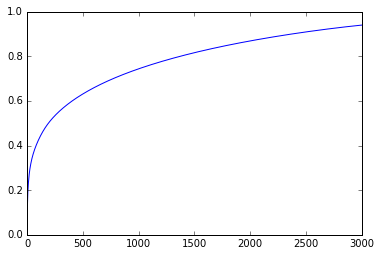

In [51]:
#3000 seems good!
cv = CountVectorizer(preprocessor=cleaner, ngram_range=(1,2))
X = cv.fit_transform(X_train)
tsvd = TruncatedSVD(n_components=3000)
tsvd.fit(X)
plt.plot(range(3000), tsvd.explained_variance_ratio_.cumsum())

**Final Step:  Grid Search Logistic Regression Over Count Vectorizer Preprocessing and Tfidf Vectorizer n_gram(1,2)**

In [40]:
bag_log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg_bagger", BaggingClassifier(log_reg, n_estimators= 15, n_jobs=1, verbose=1))
]

In [41]:
bag_log_pipe = Pipeline(bag_log_modeling_steps)

In [42]:
bag_log_pipe.fit(X_train, y_train)

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=1, warm_start=False))])

In [43]:
print(bag_log_pipe.score(X_train,y_train))
train_predictions = bag_log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.986473429952
[[ 821   61]
 [   9 4284]]
             precision    recall  f1-score   support

          0       0.99      0.93      0.96       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



In [44]:
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.95056885053
[[ 332  102]
 [  24 2091]]
             precision    recall  f1-score   support

          0       0.93      0.76      0.84       434
          1       0.95      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



In [24]:
log_reg= LogisticRegressionCV(Cs=10, cv=5, max_iter=10)

In [26]:
cv = CountVectorizer(preprocessor=cleaner)
X_train_cv = cv.fit_transform(X_train)
log_reg_bagger = BaggingClassifier(log_reg, n_jobs=-1, verbose=1)

log_reg_bagger_params = {
    'n_estimators': [10, 15, 20]
}

gs = GridSearchCV(log_reg_bagger, log_reg_bagger_params, verbose=2, n_jobs=-1)
gs.fit(X_train_cv, y_train)

[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.4min finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   36.1s remaining:   36.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   37.3s finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingClassifier(base_estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbf..._estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=1, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 15, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=1)

In [27]:
gs.best_params_

{'n_estimators': 20}

In [28]:
print(gs.best_estimator_.score(X_train_cv, y_train))
train_predictions = gs.best_estimator_.predict(X_train_cv)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.3s finished


0.986666666667
[[ 818   64]
 [   5 4288]]
             precision    recall  f1-score   support

          0       0.99      0.93      0.96       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



In [29]:
X_test_cv = cv.transform(X_test)

In [30]:
# Accuracy - .946833463643471
# Worse with grid search and more parameters
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.8s finished


[[ 341   93]
 [  34 2081]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.84       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Try just non bagged Logistic Regression**

In [24]:
cv = CountVectorizer(preprocessor=cleaner)
X_train_cv = cv.fit_transform(X_train)

In [25]:
X_test_cv = cv.transform(X_test)

In [37]:
log_reg = LogisticRegressionCV(cv=5, max_iter=10, n_jobs=1, verbose=2) 

In [31]:
log_reg_params = {
    'Cs' : [2, 4, 6, 8],
}

gs = GridSearchCV(log_reg, log_reg_params, verbose=1, n_jobs=1)
gs.fit(X_train_cv, y_train)

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=2),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'Cs': [2, 4, 6, 8]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=1)

In [32]:
gs.best_estimator_

LogisticRegressionCV(Cs=6, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=2)

In [34]:
print(gs.best_estimator_.score(X_train_cv, y_train))
train_predictions = gs.best_estimator_.predict(X_train_cv)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.997874396135
[[ 873    9]
 [   2 4291]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



In [35]:
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95135347195
[[ 346   88]
 [  36 2079]]
             precision    recall  f1-score   support

          0       0.91      0.80      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



Cs = 8
cv =5


0.95174578266
[[ 344   90]
 [  33 2082]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549

In [41]:
log_reg_params = {
    'Cs': [1, 10, 100],
    'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

gs = GridSearchCV(log_reg, log_reg_params, verbose=2, n_jobs=-1)
gs.fit(X_train_cv, y_train)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "


Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=2),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'Cs': [1, 10, 100], 'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [42]:
gs.best_estimator_

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=10,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=2)

In [43]:
print(gs.best_estimator_.score(X_train_cv, y_train))
train_predictions = gs.best_estimator_.predict(X_train_cv)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.99961352657
[[ 881    1]
 [   1 4292]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



In [45]:
#Could try reruning with less iterations.  Otherwise score is comparable to out of box logistic regression.  Maybe try more cv's.
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.954884268341
[[ 358   76]
 [  39 2076]]
             precision    recall  f1-score   support

          0       0.90      0.82      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



** Let's settle on Logistic Regression with Cs = 10, cv=5, max_iter=10).  Try this will different Tfidf Vectorizer.**

In [45]:
log_reg_modeling_steps = [
    ("tfidf_vectorizer", TfidfVectorizer(preprocessor=cleaner, ngram_range=(1,2))),
    ("log_reg", LogisticRegressionCV(Cs=10, cv=5, max_iter=10))
]

In [46]:
log_reg_pipe=Pipeline(log_reg_modeling_steps)

In [47]:
log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2',
        preprocessor=<func...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [49]:
# Overfit!
print(log_reg_pipe.score(X_train, y_train))
train_predictions = log_reg_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

1.0
[[ 882    0]
 [   0 4293]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



In [51]:
print(log_reg_pipe.score(X_test, y_test))
test_predictions = log_reg_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.948999607689
[[ 331  103]
 [  27 2088]]
             precision    recall  f1-score   support

          0       0.92      0.76      0.84       434
          1       0.95      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



# Final test.  Base Logistic Model vs. New Logistic Model vs. Linear SVM 

In [52]:
new_log_reg_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV(Cs=10, cv=5, max_iter=10))
]

In [53]:
new_log_reg_pipe = Pipeline(new_log_reg_modeling_steps)

In [54]:
new_log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [55]:
    print(new_log_reg_pipe.score(X_train, y_train))
train_predictions = new_log_reg_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.993236714976
[[ 853   29]
 [   6 4287]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



In [56]:
print(new_log_reg_pipe.score(X_test, y_test))
test_predictions = new_log_reg_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95135347195
[[ 343   91]
 [  33 2082]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



In [57]:
base_log_reg_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV())
]

In [58]:
base_log_reg_pipe = Pipeline(base_log_reg_modeling_steps)

In [59]:
base_log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [60]:
print(base_log_reg_pipe.score(X_train, y_train))
train_predictions = base_log_reg_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.993816425121
[[ 854   28]
 [   4 4289]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



In [61]:
# One more true positive, one less true negative
print(base_log_reg_pipe.score(X_test, y_test))
test_predictions = base_log_reg_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95135347195
[[ 342   92]
 [  32 2083]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



In [62]:
svm_linear_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC(kernel='linear'))
]

In [63]:
svm_linear_pipe=Pipeline(svm_linear_modeling_steps)

In [64]:
svm_linear_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [65]:
print(svm_linear_pipe.score(X_train, y_train))
train_predictions = svm_linear_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.994975845411
[[ 860   22]
 [   4 4289]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



In [66]:
print(svm_linear_pipe.score(X_test, y_test))
test_predictions = svm_linear_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.945468811299
[[ 341   93]
 [  46 2069]]
             precision    recall  f1-score   support

          0       0.88      0.79      0.83       434
          1       0.96      0.98      0.97      2115

avg / total       0.94      0.95      0.94      2549



**Base logistic regression model is the winner!**